In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
#read the csv file and view first few items
data='emails/spam_ham_dataset.csv'
df=pd.read_csv(data)
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
#drop the columns that aren't needed
df = df.drop(['Unnamed: 0', 'label'], axis=1)

In [4]:
#check the dataset
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
#print number of columns and rows
df.shape

(5171, 2)

In [6]:
#check for duplicates and srop them
df.drop_duplicates(inplace=True)

In [7]:
#show the new shape
df.shape

(4993, 2)

In [8]:
#show number of missing data for each column
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [9]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

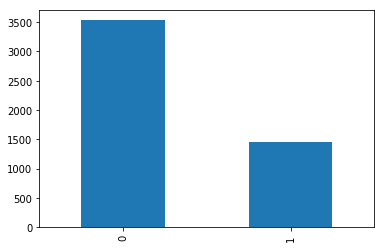

In [11]:
import matplotlib.pyplot as plt
df['label_num'].value_counts().plot(kind='bar');


In [12]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def process_text(text):
    #Remove the punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #Remove stop words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #return a list of clean text words
    return clean_words

In [14]:
#show the tokenization
df['text'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

In [15]:
#convert the text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

In [16]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label_num'], test_size=0.20, random_state=0)

In [17]:
#shape of data (rows and columns)
messages_bow.shape

(4993, 50381)

In [18]:
#evaluate the model on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
cm = None

In [19]:
#function to draw the confusion matrix
def draw_cm(model, preds, cm):
    
    #class names
    class_names=["Not spam","Spam"] 
    
    #create the figure
    fig, ax = plt.subplots()
    
    # create heatmap
    sns.heatmap(cm, annot=True, cmap="BuPu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
    
    #set labels
    ax.xaxis.set_label_position("bottom")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.yticks(rotation=0)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [20]:
#function to print the results
def report(model):
    preds=model.predict(X_test)
    print(classification_report(preds,y_test))
    print()
    print("Accuracy: ", "{:.2f}".format(accuracy_score(y_test, preds)*100), "%")
    cm = confusion_matrix(y_test, preds)
    #get number of true negatives, false positives, false negatives and true positives
    tn, fp, fn, tp = cm.ravel()
    print("True Positives: ", tp, "\nTrue Negatives: ", tn, "\nFalse Positives: ", fp, "\nFalse Negatives: ", fn)
    draw_cm(model, preds, cm)

NAIVE BAYES MODEL
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       720
           1       0.96      0.95      0.96       279

   micro avg       0.98      0.98      0.98       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.98      0.98      0.98       999


Accuracy:  97.60 %
True Positives:  266 
True Negatives:  709 
False Positives:  13 
False Negatives:  11


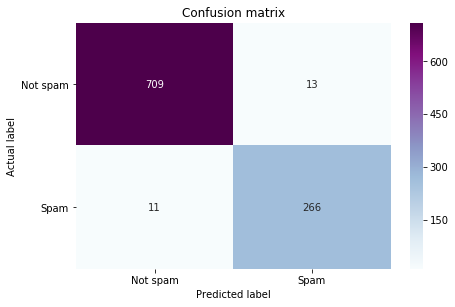

In [21]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
print("NAIVE BAYES MODEL")
report(nb_model)

LOGISTIC REGRESSION MODEL
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       716
           1       0.97      0.95      0.96       283

   micro avg       0.98      0.98      0.98       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.98      0.98       999


Accuracy:  97.80 %
True Positives:  269 
True Negatives:  708 
False Positives:  14 
False Negatives:  8


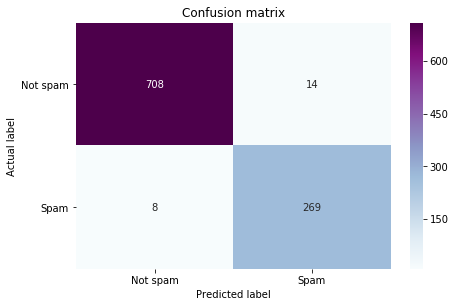

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)
print("LOGISTIC REGRESSION MODEL")
report(lr_model)

RANDOM FOREST MODEL
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       713
           1       0.99      0.95      0.97       286

   micro avg       0.98      0.98      0.98       999
   macro avg       0.98      0.97      0.98       999
weighted avg       0.98      0.98      0.98       999


Accuracy:  98.30 %
True Positives:  273 
True Negatives:  709 
False Positives:  13 
False Negatives:  4


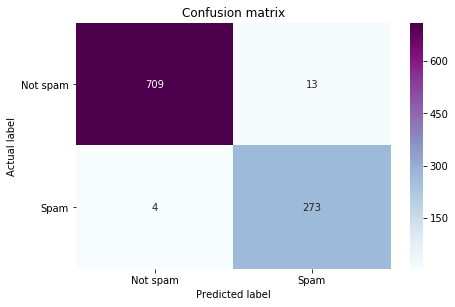

In [23]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=200, criterion="entropy")
rfc_model.fit(X_train,y_train)
print("RANDOM FOREST MODEL")
report(rfc_model)

SUPPORT VECTOR MACHINE MODEL
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       729
           1       0.92      0.95      0.94       270

   micro avg       0.96      0.96      0.96       999
   macro avg       0.95      0.96      0.96       999
weighted avg       0.97      0.96      0.97       999


Accuracy:  96.50 %
True Positives:  256 
True Negatives:  708 
False Positives:  14 
False Negatives:  21


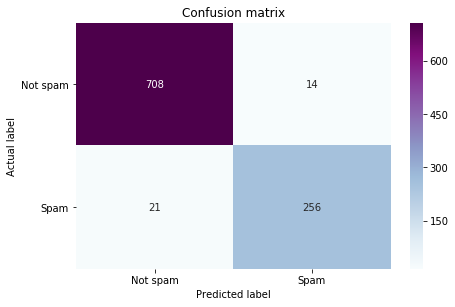

In [24]:
#svm
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train,y_train)
print("SUPPORT VECTOR MACHINE MODEL")
report(svm_model)

GRADIENT BOOSTING MODEL
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       708
           1       0.98      0.93      0.95       291

   micro avg       0.97      0.97      0.97       999
   macro avg       0.98      0.96      0.97       999
weighted avg       0.97      0.97      0.97       999


Accuracy:  97.40 %
True Positives:  271 
True Negatives:  702 
False Positives:  20 
False Negatives:  6


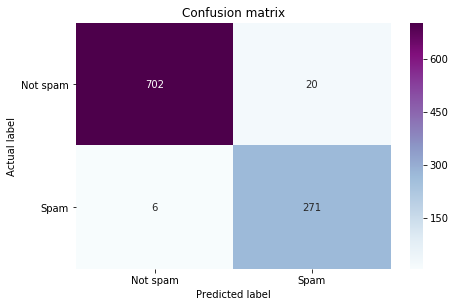

In [25]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=200)
gb_model.fit(X_train,y_train)
print("GRADIENT BOOSTING MODEL")
report(gb_model)